# Linear regression
This notebook will illustrate the contents of the lecture 5.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Load the rent index data
The data stems from a rent index in Munich from 1999 and stems from the [Textbook of L. Fahrmeir et al.](https://link.springer.com/book/10.1007/978-3-642-01837-4).

In [15]:
mietspiegel = pd.read_table("data/mietspiegel99.raw")
print(mietspiegel.dtypes)
mietspiegel.head(5)
print(mietspiegel.shape)

miete      float64
mieteqm    float64
flaeche      int64
bjahr      float64
bad          int64
kueche       int64
bezv         int64
lage         int64
zh           int64
dtype: object
(3082, 9)


| Variable  | Description                       | Categories |
|-----------|-----------------------------------|------------|
|miete      |Net rent per month (in DM)         | *numeric* |
|mieteqm    |Net rent per square meter (in DM)  | *numeric* |
|flaeche    |Living area in square meter        | *numeric* |
|bjahr      |Year of construction (in years)    | *numeric* |
|lage       |Exposure of the dwelling            |1 = norm |  
|           |                                    |2 = g  d |
|           |                                    |3 = excellent |
|bad        |Furnishings in the bathroom         |0 = normal |
|           |                                    |1 = upper |
|kueche     |Furnishings in the kitchen         | 0 = normal |
|           |                                    |1 = upper |
|zh         |Central heating                     |0 = no |
|           |                                    |1 = yes |
|bez        |District in Munich                | *numeric* |
ich	(numeric)


## Some data preparations

In [16]:
mietspiegel.bjahr = mietspiegel.bjahr.astype(int)
#mietspiegel = mietspiegel[mietspiegel.bjahr <= 1995]
mietspiegel


,miete,mieteqm,flaeche,bjahr,bad,kueche,bezv,lage,zh
0,235.9,6.740000,35,1939,0,0,1112,1,0
1,852.1,8.193269,104,1939,1,0,1112,1,1
2,693.7,23.920690,29,1971,0,0,2114,2,1
3,551.7,14.146150,39,1972,0,0,2148,2,1
4,1574.1,16.227830,97,1985,0,0,2222,1,1
...,...,...,...,...,...,...,...,...,...
3077,1024.5,15.291050,67,1971,0,0,2148,2,1
3078,1389.6,16.742170,83,1918,0,0,341,2,0
3079,1624.8,14.770910,110,1918,1,0,961,2,1
3080,1086.8,26.507320,41,1972,0,0,381,2,1


## Descriptive analyses
We compute descriptive statistics for all variables and visualize the correlation of all variables

In [17]:
mietspiegel.describe()

,miete,mieteqm,flaeche,bjahr,bad,kueche,bezv,lage,zh
count,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000
mean,895.902498,13.866955,67.374757,1956.244971,0.061973,0.042505,1169.715769,1.443219,0.895847
std,381.530442,4.750216,23.720446,22.298381,0.241145,0.201771,677.849333,0.545425,0.305509
min,79.000000,0.810811,20.000000,1918.000000,0.000000,0.000000,113.000000,1.000000,0.000000
25%,627.950000,10.258868,51.000000,1939.000000,0.000000,0.000000,561.000000,1.000000,1.000000
50%,832.600000,13.611470,65.000000,1959.000000,0.000000,0.000000,1025.000000,1.000000,1.000000
75%,1090.750000,17.239607,81.000000,1972.000000,0.000000,0.000000,1714.000000,2.000000,1.000000
max,3594.600000,34.557140,160.000000,1997.000000,1.000000,1.000000,2529.000000,3.000000,1.000000


TypeError: 'int' object is not callable

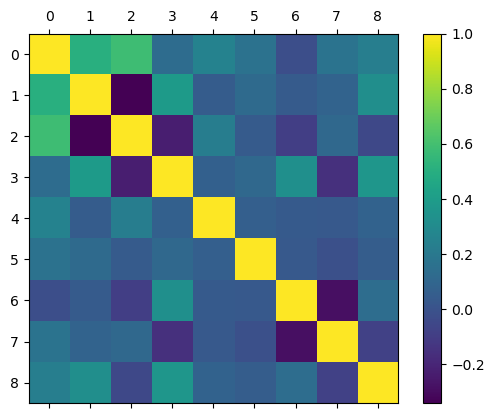

In [18]:
colnames = mietspiegel.columns.values
#print(colnames)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(mietspiegel.corr())
fig.colorbar(cax)

#set the column names as axis tick labels
xaxis = np.arange(len(colnames))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(colnames)
ax.set_yticklabels(colnames)

plt.show()

## First regression model
The rent (`miete`) has a high correlation with the living space area (`flaeche`).

<Axes: xlabel='flaeche', ylabel='miete'>

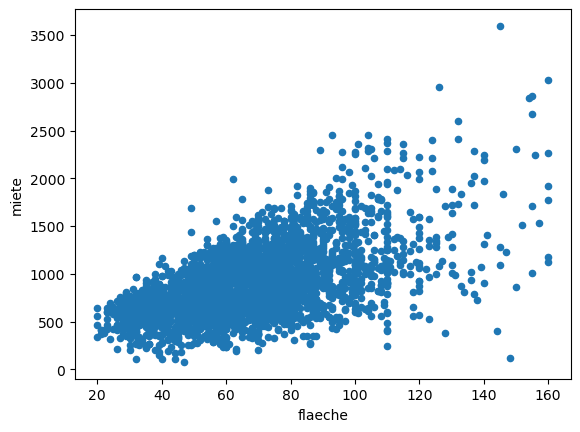

In [19]:
mietspiegel.plot.scatter(x="flaeche", y="miete")

In [20]:
# Create linear regression object
regr1 = linear_model.LinearRegression()

#extract the variables that we need from the dataset
y = mietspiegel.miete.values
x = mietspiegel.flaeche.values

# they currently have the shape (3059,) but we need (3059,1), see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
print(y.shape)
len = x.size
x = x.reshape(len, 1)
y = y.reshape(len, 1)
print(y.shape)

# We fit a linear regression model
regr1.fit(x, y)

# The regression coefficient
print("Coefficients: \n", regr1.coef_)
print("Intercept: \n", regr1.intercept_)


(3082,)
(3082, 1)
Coefficients: 
 [[9.40185535]]
Intercept: 
 [262.45478219]


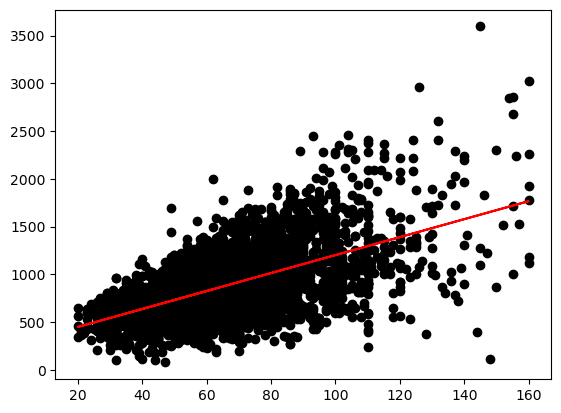

In [21]:
pred = regr1.predict(x)
plt.scatter(x, y, color="black")
plt.plot(x, pred, color="red")
plt.show()

# Regression using statsmodel library
We see that the interface to the regression model with scikit learn is very limited. This is not surprising, given that scikit learn is a library primarily used for machine learning application. If more insights are needed into regression models -- indeed, linear regression is a very powerful tool to understand data and conduct exploratory data analysis -- you can use the statsmodel library. 

Further learning resources using the statsmodel library with python can be found in an [online book by the Simon Fraser University](https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/09_regression.html).

In [22]:
x2 = sm.add_constant(x)
model = sm.OLS(y, x2, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     1599.
Date:                Mon, 13 May 2024   Prob (F-statistic):          6.13e-282
Time:                        11:07:12   Log-Likelihood:                -22048.
No. Observations:                3082   AIC:                         4.410e+04
Df Residuals:                    3080   BIC:                         4.411e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        262.4548     16.796     15.626      0.000     229.522     295.388
x1             9.4019      0.235     39.982      0.000       8.941       9.863
==============================================================================
Omnibus:                      209.552   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.485
Skew:                           0.448   Prob(JB):                     8.23e-97
Kurtosis:                       4.625   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

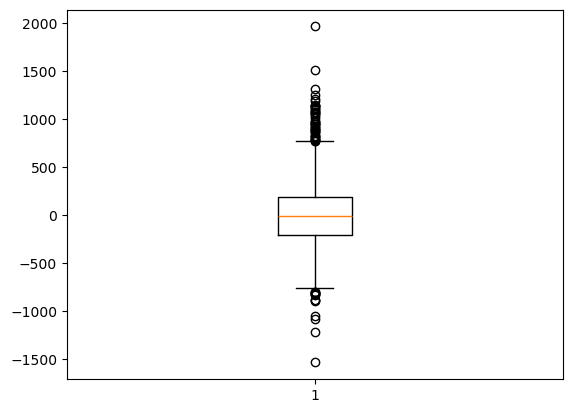

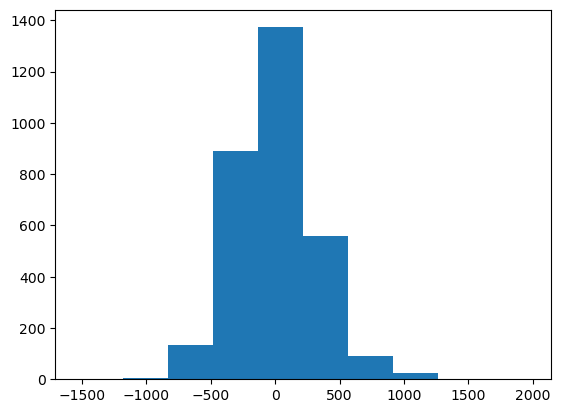

In [23]:
plt.boxplot(model_result.resid)
plt.show()
plt.hist(model_result.resid)
plt.show()

In [ ]:
x3 = mietspiegel[["flaeche", "lage","kueche"]]
x3 = sm.add_constant(x3)
#print(x3)

model2 = sm.OLS(y, x3, missing='drop')
model2_result = model2.fit()
model2_result.summary()